<a href="https://colab.research.google.com/github/neel-shel/fingerprint_detection/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

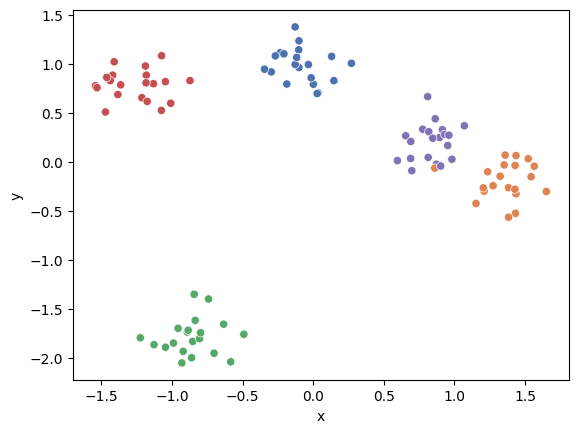

In [29]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
from scipy.spatial.distance import cdist
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [22]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [28]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Randomly select centroid start points, uniformly distributed across the domain of the dataset
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroids = np.array([np.random.uniform(min_, max_) for _ in range(self.n_clusters)])

        iteration = 0
        prev_centroids = None
        while not np.array_equal(self.centroids, prev_centroids) and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            distances = cdist(X_train, self.centroids)
            nearest_centroids = np.argmin(distances, axis=1)
            sorted_points = [[] for _ in range(self.n_clusters)]
            for idx, centroid_idx in enumerate(nearest_centroids):
                sorted_points[centroid_idx].append(X_train[idx])

            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids.copy()
            for i in range(self.n_clusters):
                if sorted_points[i]:  # Only update centroid if it has points assigned
                    self.centroids[i] = np.mean(sorted_points[i], axis=0)
            iteration += 1

    def evaluate(self, X):
        distances = cdist(X, self.centroids)
        nearest_centroids = np.argmin(distances, axis=1)
        centroids = self.centroids[nearest_centroids]
        return centroids, nearest_centroids

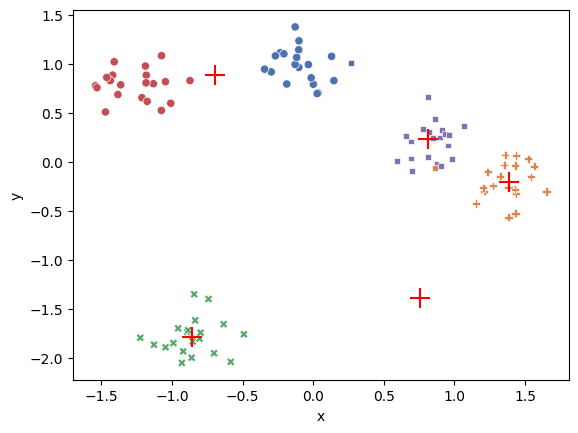

In [37]:
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='+', s=200, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.show()